In [1]:
# import libraries to use (pandas, matplotlib.pyplot and seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

%matplotlib inline

### Get the numeric data into dataframe

Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
 

In [2]:
# Import data from Data folder and create a data frame named "data"
data = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')

**! No need to run cell below** - except for check of data types

In [ ]:
# Check data types of columns
data.dtypes

In [5]:
# Create data frame: "numerical" contains all the number columns
numerical = data.select_dtypes(np.number)
numerical.head()

customer_lifetime_value  income  monthly_premium_auto  \
0                     4809   48029                    61   
1                     2228   92260                    64   
2                    14947   22139                   100   
3                    22332   49078                    97   
4                     9025   23675                   117   

   months_since_last_claim  months_since_policy_inception  \
0                        7                             52   
1                        3                             26   
2                       34                             31   
3                       10                              3   
4                       33                             31   

   number_of_open_complaints  number_of_policies  total_claim_amount  
0                          0                   9                 292  
1                          0                   1                 744  
2                          0                   2                 480  
3                          0                   2                 484  
4                          0                   7                 707

In [6]:
# Create data frame: "categoricals" saves everything but numerical

categoricals = data.select_dtypes(exclude = np.number)
categoricals.head()

region response  coverage education effective_to_date month  \
0      central       no     basic   college           2/18/11   feb   
1  west region       no     basic   college           1/18/11   jan   
2         east       no     basic  bachelor           2/10/11   feb   
3   north west      yes  extended   college           1/11/11   jan   
4   north west       no   premium  bachelor           1/17/11   jan   

  employment_status gender location_code marital_status     policy_type  \
0          employed      m      suburban        married  corporate auto   
1        unemployed      f      suburban         single   personal auto   
2          employed      m      suburban         single   personal auto   
3          employed      m      suburban         single  corporate auto   
4     medical leave      f      suburban        married   personal auto   

         policy renew_offer_type sales_channel  vehicle_class vehicle_size  
0  corporate l3           offer3         agent  four-door car      medsize  
1   personal l3           offer4   call center  four-door car      medsize  
2   personal l3           offer3   call center            suv      medsize  
3  corporate l3           offer2        branch  four-door car      medsize  
4   personal l2           offer1        branch  four-door car      medsize

### Check the normality of the numerical variables visually

Use seaborn library to construct distribution plots for the numerical variables

### Construct histograms

The histograms illustrated below show the lack of normality in any of the observed features.

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

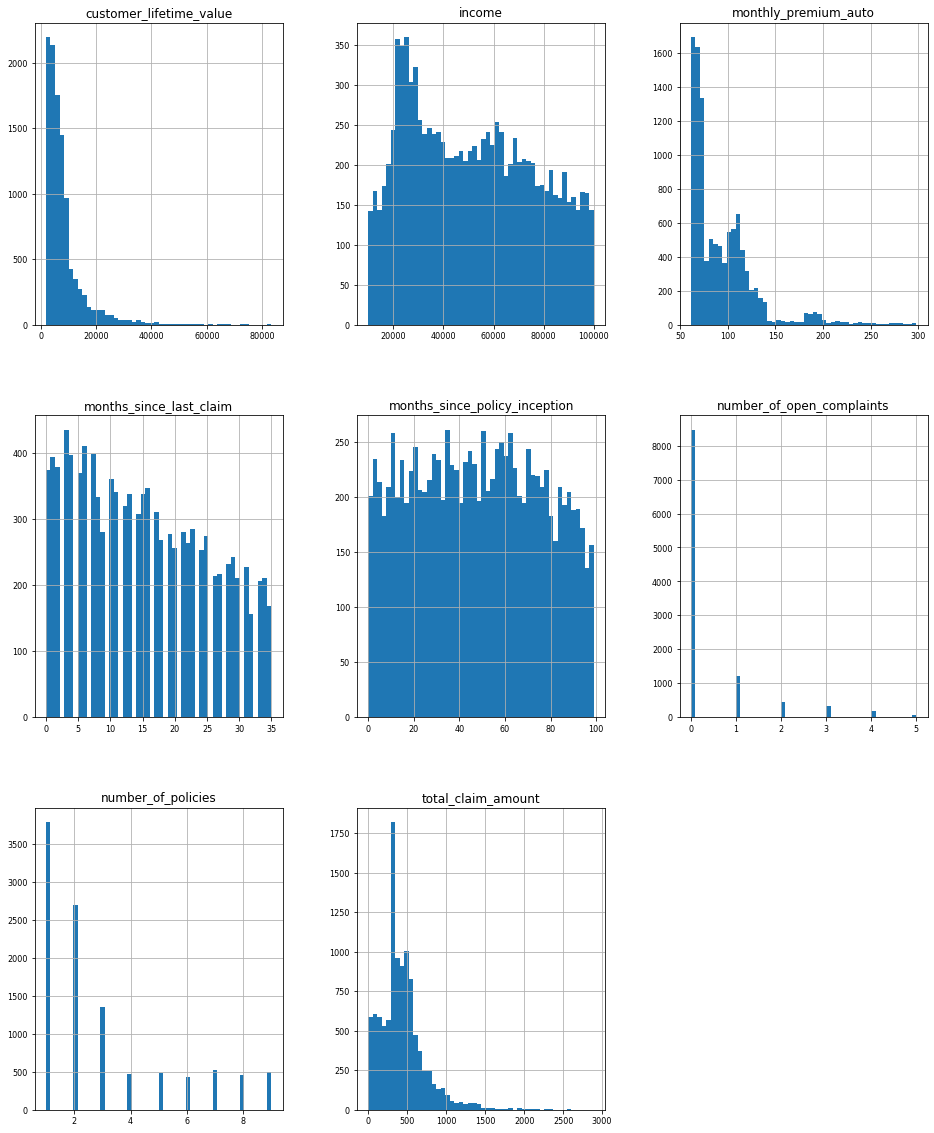

In [8]:
numerical.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8)

As an alternative to using the histogram function, there's a chance to use displot from Seaborn. The function will run on every variable listed within the numerical dataframe (integer or float values exclusively).

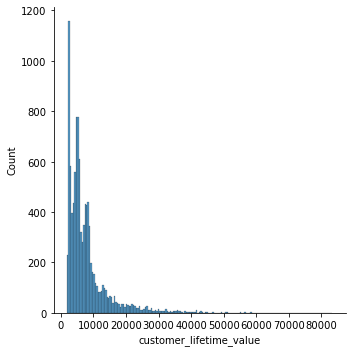

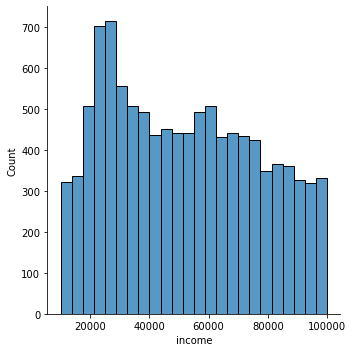

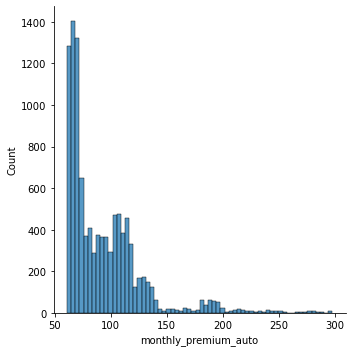

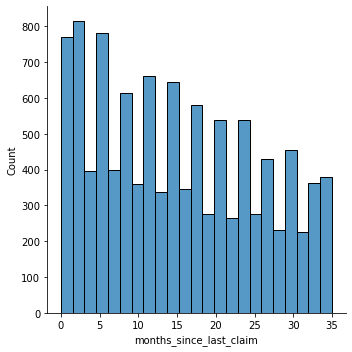

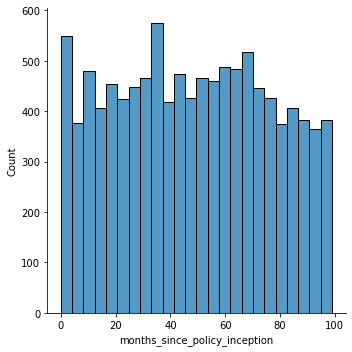

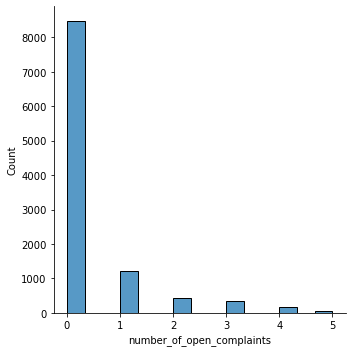

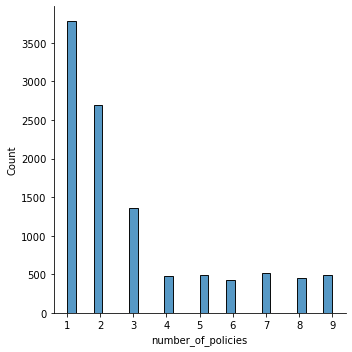

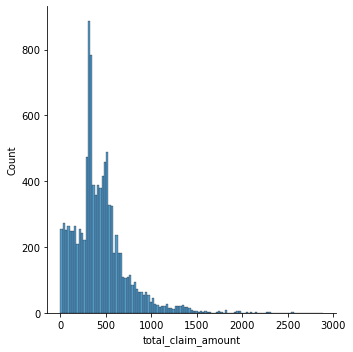

In [9]:
for it in list(numerical.columns):
#    sns.displot(numerical["income"])
    sns.displot(numerical[it])

In [10]:
# Just for reference of the use of distplot
# print(numerical['customer_lifetime_value'].describe())
# plt.figure(figsize=(9, 8))
# sns.distplot(numerical['customer_lifetime_value'], color='g', bins=100, hist_kws={'alpha': 0.4});

### Transformation into normal distribution
 
Rather than attempting every feature to be normalized, only the variables with an appearance close to a normal are transformed. The following are:

- Customer lifetime value
- Total claim amount

**Normalization of the customer lifetime value**

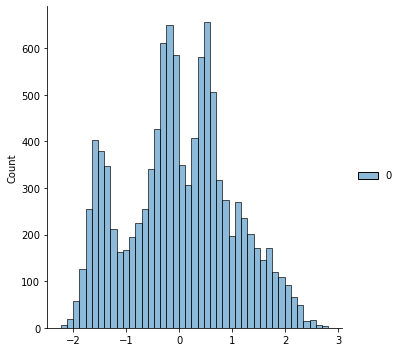

In [11]:
pt = PowerTransformer()
lifetime_value_transformed=pt.fit_transform(numerical['customer_lifetime_value'].to_numpy().reshape(-1,1))
sns.displot(lifetime_value_transformed)

**Normalization of the total claim amount**

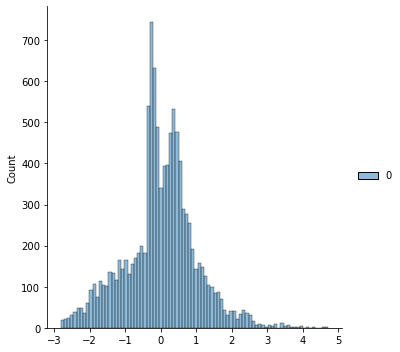

In [12]:
pt = PowerTransformer()
claim_amount_transformed=pt.fit_transform(numerical['total_claim_amount'].to_numpy().reshape(-1,1))
sns.displot(claim_amount_transformed)

### Determine numerical correlation between features

In order to determine whether the data is affected by the correlation of any features in a table format, we will evaluate all of the numerical variables with the correlation function:

In [13]:
numerical.corr()

customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.003732   
income                                        0.003732  1.000000   
monthly_premium_auto                          0.404235 -0.002431   
months_since_last_claim                       0.011912 -0.026564   
months_since_policy_inception                 0.017055  0.003846   
number_of_open_complaints                    -0.032371  0.018903   
number_of_policies                            0.016789 -0.004461   
total_claim_amount                            0.232849 -0.111221   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.404235                 0.011912   
income                                    -0.002431                -0.026564   
monthly_premium_auto                       1.000000                 0.010036   
months_since_last_claim                    0.010036                 1.000000   
months_since_policy_inception              0.019696                -0.034086   
number_of_open_complaints                 -0.008811                 0.001204   
number_of_policies                        -0.018805                 0.000814   
total_claim_amount                         0.630149                 0.013874   

                               months_since_policy_inception  \
customer_lifetime_value                             0.017055   
income                                              0.003846   
monthly_premium_auto                                0.019696   
months_since_last_claim                            -0.034086   
months_since_policy_inception                       1.000000   
number_of_open_complaints                           0.002554   
number_of_policies                                 -0.009719   
total_claim_amount                                  0.004186   

                               number_of_open_complaints  number_of_policies  \
customer_lifetime_value                        -0.032371            0.016789   
income                                          0.018903           -0.004461   
monthly_premium_auto                           -0.008811           -0.018805   
months_since_last_claim                         0.001204            0.000814   
months_since_policy_inception                   0.002554           -0.009719   
number_of_open_complaints                       1.000000           -0.000303   
number_of_policies                             -0.000303            1.000000   
total_claim_amount                             -0.010668           -0.008019   

                               total_claim_amount  
customer_lifetime_value                  0.232849  
income                                  -0.111221  
monthly_premium_auto                     0.630149  
months_since_last_claim                  0.013874  
months_since_policy_inception            0.004186  
number_of_open_complaints               -0.010668  
number_of_policies                      -0.008019  
total_claim_amount                       1.000000

Apart from displaying the data in a table, a quicker decision can be made by analyzing the same information in the shape of a heatmap.

### Correlation heatmap

Despite the information being exactly the same, we can visually distinguish the highest correlated variables within the heatmap:
- Total claim amount
- Monthly premium auto

Despite standing out with respect to the other features, the correlation is not high enough (0.9) as to determine the need to drop any of them.

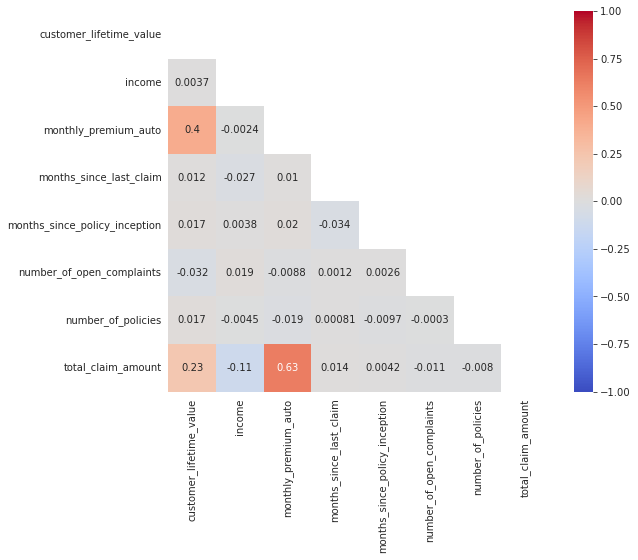

In [14]:
corr = numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

# Drop features with correlation higher than 0.9

Select which feature should be removed from the set of highly correlated features.


## Summary

**No correlation is higher than 0.9, hence there is no need to drop any feature.**

If there were, rather than dropping all features at once, the following steps would be considered:

- Calculation of the Variance Inflation Factor (VIF)
- Discard the feature with highest VIF (preferrably VIF > 5)
- Calculate correlation factor again
- Repeat the process as long as there's a feature with a correlation higher than 0.9

In [15]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = numerical[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [16]:
# features to consider removing
considered_features = ['monthly_premium_auto', 'customer_lifetime_value', 'total_claim_amount']


# compute vif 
compute_vif(considered_features).sort_values('VIF', ascending=False)

/var/folders/8f/tmg8vtq91173zzcjhk5pbsdh0000gn/T/ipykernel_14901/2262381399.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


Variable       VIF
0     monthly_premium_auto  1.876868
2       total_claim_amount  1.660190
1  customer_lifetime_value  1.196458

# Day 4 

### Plot of the total number of responses.

In [17]:
responses = categoricals['response'].value_counts()
responses

no     9316
yes    1373
Name: response, dtype: int64

Text(0, 0.5, 'Amount of responses')

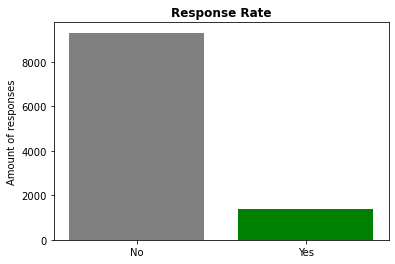

In [18]:
# Create figure and axes
plt.bar(responses.index, responses, color=('grey','green'))
# set title
plt.title('Response Rate', fontweight='bold')
plt.xticks(ticks=[0,1],labels=["No","Yes"])
plt.ylabel("Amount of responses")



In [19]:
sales_channel = categoricals['sales_channel'].value_counts()
sales_channel

agent          4019
branch         2975
call center    2099
web            1596
Name: sales_channel, dtype: int64

In [20]:
sales_ch_response = categoricals.groupby(['sales_channel', 'response'])['response'].count().rename('count').reset_index()
sales_channel_agent = sales_ch_response[sales_ch_response['sales_channel']=='agent']
sales_channel_branch = sales_ch_response[sales_ch_response['sales_channel']=='branch']
sales_channel_call_center = sales_ch_response[sales_ch_response['sales_channel']=='call center']
sales_channel_web = sales_ch_response[sales_ch_response['sales_channel']=='web']



In [21]:
sales_ch_response

sales_channel response  count
0         agent       no   3340
1         agent      yes    679
2        branch       no   2665
3        branch      yes    310
4   call center       no   1890
5   call center      yes    209
6           web       no   1421
7           web      yes    175

Text(0.5, 1.0, 'Web')

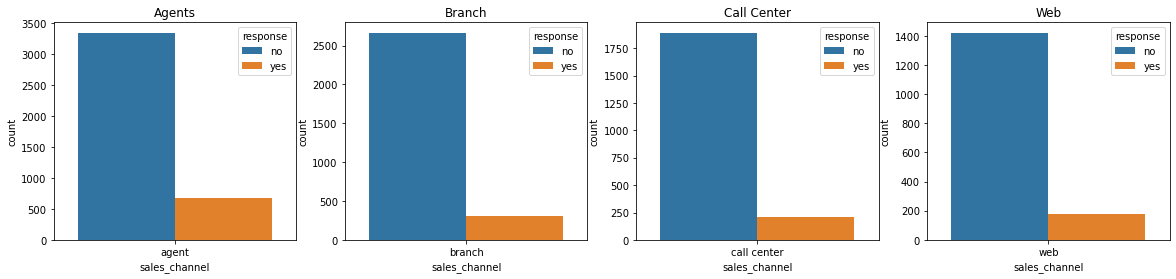

In [22]:
fig5, axes5 = plt.subplots(1,4,figsize=(20,4))

sns.barplot(x='sales_channel', y='count', hue = 'response', data = sales_channel_agent, ax = axes5[0])
axes5[0].set_title('Agents')
sns.barplot(x='sales_channel', y='count', hue = 'response', data = sales_channel_branch, ax = axes5[1])
axes5[1].set_title('Branch')
sns.barplot(x='sales_channel', y='count', hue = 'response', data = sales_channel_call_center, ax = axes5[2])
axes5[2].set_title('Call Center')
sns.barplot(x='sales_channel', y='count', hue = 'response', data = sales_channel_web, ax = axes5[3])
axes5[3].set_title('Web')

In [23]:
total_claim_response = data.groupby(['total_claim_amount','response'])['response'].count().rename('count').reset_index()
total_claim_response

total_claim_amount response  count
0                      0       no      9
1                      1       no      9
2                      2       no     12
3                      3       no      9
4                      4       no     12
...                  ...      ...    ...
1358                2345       no      1
1359                2452       no      1
1360                2552       no      2
1361                2759       no      1
1362                2893       no      1

[1363 rows x 3 columns]

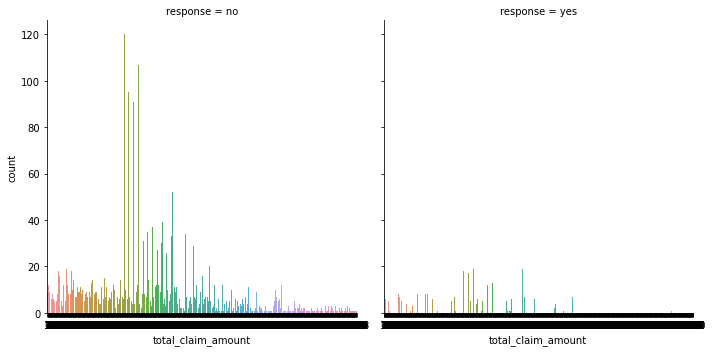

In [24]:
fg6 = sns.catplot(x='total_claim_amount', y = 'count', data = total_claim_response, col='response', kind='bar')


The graph is too atomized as to be able to make any kind of conclusion. In order to be able to view some information, the claim amount will be grouped.

In [26]:
data["total_claim_amount"].describe()

count    10689.000000
mean       434.227243
std        292.550878
min          0.000000
25%        269.000000
50%        383.000000
75%        547.000000
max       2893.000000
Name: total_claim_amount, dtype: float64

In [25]:
data["total_claim_amount"].value_counts()

316     147
292     143
350     137
312     128
331     123
       ... 
816       1
1980      1
1543      1
1562      1
1621      1
Name: total_claim_amount, Length: 1172, dtype: int64

In [ ]:
data["total_claim_amount"].describe()

In [73]:
def claim_groups ():
    data.loc[data["total_claim_amount"]<=100,"total_claim_group"]=" 100"
    data.loc[data["total_claim_amount"]>100,"total_claim_group"]=" 200"
    data.loc[data["total_claim_amount"]>200,"total_claim_group"]=" 300"
    data.loc[data["total_claim_amount"]>300,"total_claim_group"]=" 400"
    data.loc[data["total_claim_amount"]>400,"total_claim_group"]=" 500"
    data.loc[data["total_claim_amount"]>500,"total_claim_group"]=" 600"
    data.loc[data["total_claim_amount"]>600,"total_claim_group"]=" 700"
    data.loc[data["total_claim_amount"]>700,"total_claim_group"]=" 800"
    data.loc[data["total_claim_amount"]>800,"total_claim_group"]=" 900"
    data.loc[data["total_claim_amount"]>900,"total_claim_group"]="1,000"
    data.loc[data["total_claim_amount"]>1000,"total_claim_group"]="Over 1,000 "
    return data

In [74]:
data_w_claim = claim_groups()
data_w_claim.head()

region  customer_lifetime_value response  coverage education  \
0      central                     4809       no     basic   college   
1  west region                     2228       no     basic   college   
2         east                    14947       no     basic  bachelor   
3   north west                    22332      yes  extended   college   
4   north west                     9025       no   premium  bachelor   

  effective_to_date month employment_status gender  income  ...  \
0           2/18/11   feb          employed      m   48029  ...   
1           1/18/11   jan        unemployed      f   92260  ...   
2           2/10/11   feb          employed      m   22139  ...   
3           1/11/11   jan          employed      m   49078  ...   
4           1/17/11   jan     medical leave      f   23675  ...   

  number_of_open_complaints number_of_policies     policy_type        policy  \
0                         0                  9  corporate auto  corporate l3   
1                         0                  1   personal auto   personal l3   
2                         0                  2   personal auto   personal l3   
3                         0                  2  corporate auto  corporate l3   
4                         0                  7   personal auto   personal l2   

   renew_offer_type  sales_channel  total_claim_amount  vehicle_class  \
0            offer3          agent                 292  four-door car   
1            offer4    call center                 744  four-door car   
2            offer3    call center                 480            suv   
3            offer2         branch                 484  four-door car   
4            offer1         branch                 707  four-door car   

  vehicle_size total_claim_group  
0      medsize               300  
1      medsize               800  
2      medsize               500  
3      medsize               500  
4      medsize               800  

[5 rows x 25 columns]

In [75]:
claim_group_response = data_w_claim.groupby(['total_claim_group','response'])['response'].count().rename('count').reset_index()
claim_group_response

total_claim_group response  count
0                100       no    958
1                100      yes     88
2                200       no    884
3                200      yes     77
4                300       no   1076
5                300      yes    118
6                400       no   2035
7                400      yes    379
8                500       no   1417
9                500      yes    220
10               600       no   1068
11               600      yes    259
12               700       no    607
13               700      yes    104
14               800       no    385
15               800      yes     36
16               900       no    269
17               900      yes     21
18             1,000       no    205
19             1,000      yes      8
20       Over 1,000        no    412
21       Over 1,000       yes     63

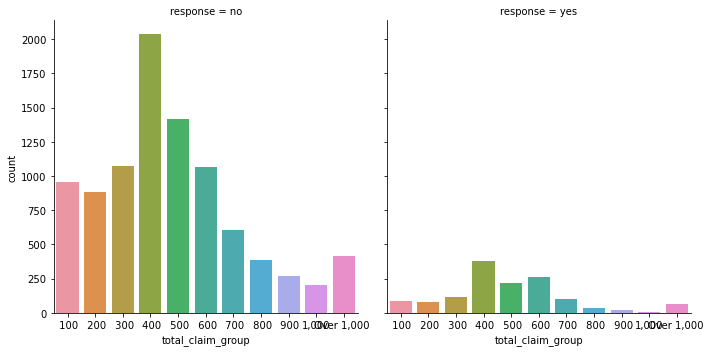

In [76]:
fg8 = sns.catplot(x='total_claim_group', y = 'count', data = claim_group_response, col='response', kind='bar')


### Response by income

Given that the amount of incomes could be considered as infinite options (or continuous), different groups of income ranges have been created to treat it as a discrete distribution. 

In [83]:
income_response = data.groupby(['income','response'])['response'].count().rename('count').reset_index()
income_response

income response  count
0      10037       no      1
1      10074       no      1
2      10088       no      1
3      10097       no      2
4      10105       no      1
...      ...      ...    ...
8344   99934       no      1
8345   99960       no      1
8346   99961       no      1
8347   99971       no      1
8348   99981       no      1

[8349 rows x 3 columns]

In [84]:
numerical['income'].describe()

count    10689.000000
mean     51750.243989
std      24778.053035
min      10037.000000
25%      29335.000000
50%      50398.000000
75%      72131.000000
max      99981.000000
Name: income, dtype: float64

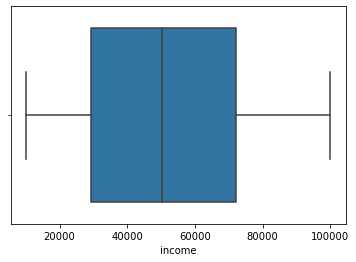

In [85]:
ax = sns.boxplot(x=numerical["income"])

In [86]:
income_response.dtypes

income       int64
response    object
count        int64
dtype: object

In [87]:
def income_groups ():
    data.loc[data["income"]<=30000,"income_group"]="<= 30,000"
    data.loc[data["income"]> 30000,"income_group"]="<= 50,000"
    data.loc[data["income"]> 50000,"income_group"]="<= 70,000"
    data.loc[data["income"]> 70000,"income_group"]="Up to 100,000"
    return data

In [88]:
new_data = income_groups()
new_data

region  customer_lifetime_value response  coverage education  \
0          central                     4809       no     basic   college   
1      west region                     2228       no     basic   college   
2             east                    14947       no     basic  bachelor   
3       north west                    22332      yes  extended   college   
4       north west                     9025       no   premium  bachelor   
...            ...                      ...      ...       ...       ...   
10684      central                    15563       no   premium  bachelor   
10685   north west                     5259       no     basic   college   
10686      central                    23893       no  extended  bachelor   
10687  west region                    11971       no   premium   college   
10688      central                     6857       no     basic  bachelor   

      effective_to_date month employment_status gender  income  ...  \
0               2/18/11   feb          employed      m   48029  ...   
1               1/18/11   jan        unemployed      f   92260  ...   
2               2/10/11   feb          employed      m   22139  ...   
3               1/11/11   jan          employed      m   49078  ...   
4               1/17/11   jan     medical leave      f   23675  ...   
...                 ...   ...               ...    ...     ...  ...   
10684           1/19/11   jan        unemployed      f   61541  ...   
10685            1/6/11   jan          employed      f   61146  ...   
10686            2/6/11   feb          employed      f   39837  ...   
10687           2/13/11   feb          employed      f   64195  ...   
10688            1/8/11   jan        unemployed      m   68942  ...   

      number_of_policies     policy_type        policy  renew_offer_type  \
0                      9  corporate auto  corporate l3            offer3   
1                      1   personal auto   personal l3            offer4   
2                      2   personal auto   personal l3            offer3   
3                      2  corporate auto  corporate l3            offer2   
4                      7   personal auto   personal l2            offer1   
...                  ...             ...           ...               ...   
10684                  7   personal auto   personal l1            offer3   
10685                  6   personal auto   personal l3            offer2   
10686                  2  corporate auto  corporate l3            offer1   
10687                  6   personal auto   personal l1            offer1   
10688                  3   personal auto   personal l1            offer4   

       sales_channel  total_claim_amount  vehicle_class vehicle_size  \
0              agent                 292  four-door car      medsize   
1        call center                 744  four-door car      medsize   
2        call center                 480            suv      medsize   
3             branch                 484  four-door car      medsize   
4             branch                 707  four-door car      medsize   
...              ...                 ...            ...          ...   
10684            web                1214     luxury car      medsize   
10685         branch                 273  four-door car      medsize   
10686            web                 381     luxury suv      medsize   
10687         branch                 618            suv      medsize   
10688            web                1021            suv      medsize   

      total_claim_group   income_group  
0                   300      <= 50,000  
1                   800  Up to 100,000  
2                   500      <= 30,000  
3                   500      <= 50,000  
4                   800      <= 30,000  
...                 ...            ...  
10684       Over 1,000       <= 70,000  
10685               300      <= 70,000  
10686               400      <= 50,000  
10687               700      <= 70,000  
10688       Over 

In [89]:
income_group_response = new_data.groupby(['income_group','response'])['response'].count().rename('count').reset_index()
income_group_response

income_group response  count
0      <= 30,000       no   2290
1      <= 30,000      yes    491
2      <= 50,000       no   2251
3      <= 50,000      yes    268
4      <= 70,000       no   2181
5      <= 70,000      yes    298
6  Up to 100,000       no   2594
7  Up to 100,000      yes    316

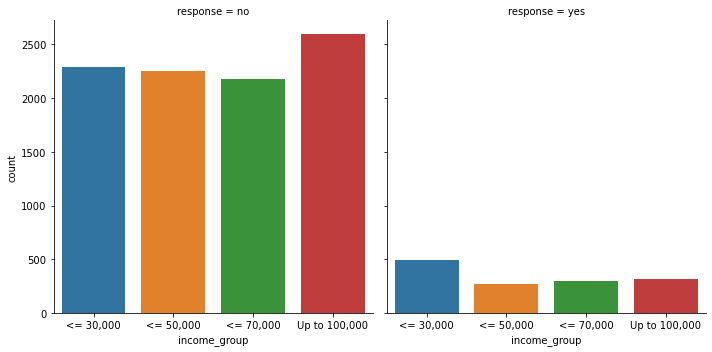

In [90]:
fg10 = sns.catplot(x='income_group', y = 'count', data = income_group_response, col='response', kind='bar')
